# Breast Cancer Detection

#### by Fuat Akal


## Table of Content

[Problem](#problem)  
[Loading Libraries](#loading_libraries)  
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

Breast cancer is one of the most common cancers among women. It is also the leading cause of cancer death among women ages 35 to 54. Breast cancer happens when cells in a breast grow and divide in an uncontrolled way, creating a mass of tissue called a tumor [1]. In this small data science project, we will try to identify tumors as benign or malignant by using machine learning.

## Loading Libraries <a class="anchor" id="loading_libraries"></a>

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns

# Configure Constants
seed = 42 # ultimate answer to everything
pd.options.display.max_columns = None
pd.options.display.max_rows = None # default 60

## Data Preparation<a class="anchor" id="data_preparation"></a>

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data).

Features of the dataset are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. There are 569 instances (patients) and 32 attributes in the dataset. The first and the second columns stand for patient id and tumor class, respectively. The remaining 30 columns are real-valued features [2].


In [6]:
# the url to retrieve the dataset from
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Proper column names are not available in the original dataset.
# They can be obtained from the UCI Machine Learning Repository though.
names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

# Retrieve data
df = pd.read_csv(url, names=names)

# Display top 5 rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# Check the dimensions of the data
df.shape

(569, 33)

In [8]:
# Drop the id column as it has no use for machine learning
df.drop(['id'], 1, inplace=True)

# Drop columns with missing values (na, NAN, NaN)
df.dropna(axis=1, inplace=True)

In [9]:
# Let's check the dimension again
df.shape

(569, 31)

B    357
M    212
Name: diagnosis, dtype: int64


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

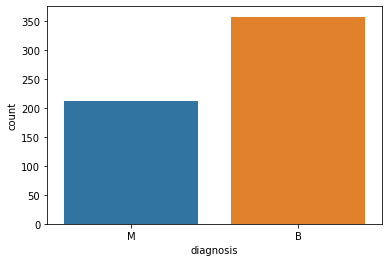

In [10]:
# Wondering how the classes are distributed
# B:Benign, M:Malignant
print(df['diagnosis'].value_counts())

# Visualize diagnosis counts (classes)
sns.countplot(x=df['diagnosis'], label="Count")

In [11]:
# Change all Ms to 1 and all Bs to 0 in the diagnosis column (class/target label)
mapper = {'M':1, 'B':0} 
df['diagnosis'] = df['diagnosis'].replace(mapper)

In [12]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Modeling<a class="anchor" id="modeling"></a>

In [13]:
# Split the data into train and test sets, X and Y
X = df.iloc[:, 1:].values 
y = df.iloc[:, 0].values  # Hint: The target variable 'diagnosis' is located at the first column (zeroth index)

**Split the Data stratified**: The ‘stratify’ parameter comes into handy so that the proportion of values in the sample produced in our test group will be the same as the proportion of values provided to parameter stratify. This results especially useful when working around classification problems, since if we don’t provide this parameter with an array-like object, we may end with a non-representative distribution of our target classes in our test group.

In [14]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed, stratify=y)

In [15]:
# Scale the data to bring all features to the same level of magnitude
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# We will build a Logistic Regression model
# We have randomly picked this algorithm and its parameters
lr = LogisticRegression(random_state = seed, solver = 'lbfgs')
lr.fit(X_train, y_train)

# Print model's accuracy on the training data.
print('Logistic Regression Training Accuracy:', lr.score(X_train, y_train))


Logistic Regression Training Accuracy: 0.9671361502347418


## Evaluation<a class="anchor" id="evaluation"></a>

In [17]:
# Let's see how our model behaves with unseen data
# Make predictions by using the test data
y_hat = lr.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_hat)
  
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
  
print("Confusion Matrix\n", cm, "\n")

# We can use an available method to compute accuracy
# We compute all metrics manually at the very bottom of this code
print('Testing Accuracy = ', accuracy_score(y_test, y_hat))

# Check precision, recall, f1-score in a detailed report
print("\nClassification Report:")
print("----------------------\n")
print(classification_report(y_test, y_hat))



Confusion Matrix
 [[90  0]
 [ 3 50]] 

Testing Accuracy =  0.9790209790209791

Classification Report:
----------------------

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



[Text(0, 0.5, 'Benign'), Text(0, 1.5, 'Malignant')]

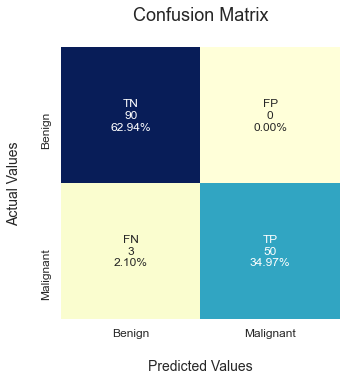

In [18]:
# Visualize the confusion matrix
sns.set(color_codes=True)
plt.figure(1, figsize=(5, 5))
classes = ["Benign", "Malignant"]

group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap="YlGnBu", cbar=False)
ax.set_title('Confusion Matrix\n', size=18);
ax.set_xlabel('\nPredicted Values', size=14)
ax.set_ylabel('Actual Values\n', size=14);
ax.xaxis.set_ticklabels(classes, size = 12)
ax.yaxis.set_ticklabels(classes, size = 12)


In [19]:
# Finally, compute some metrics manually to see if everything checks out
Accuracy = (TP + TN) / (TP + TN + FN + FP)
Recall = TP / (TP + FN)
Precision = TP / (TP + FP)
F1Score = 2 * Precision * Recall / (Precision + Recall)

print("Accuracy = (TP + TN) / (TP + TN + FN + FP) = ", Accuracy)
print("Recall = TP / (TP + FN) = ", Recall)
print("Precision = TP / (TP + FP) = ", Precision)
print("F1-score = 2 * Precision * Recall / (Precision + Recall) = ", F1Score)

Accuracy = (TP + TN) / (TP + TN + FN + FP) =  0.9790209790209791
Recall = TP / (TP + FN) =  0.9433962264150944
Precision = TP / (TP + FP) =  1.0
F1-score = 2 * Precision * Recall / (Precision + Recall) =  0.970873786407767


## References<a class="anchor" id="references"></a>

1. American Cancer Society. [Breast Cancer Overview](https://www.cancer.org/cancer/breast-cancer.html).
2. [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).
3. [Confusion Matrix](https://www.sciencedirect.com/topics/engineering/confusion-matrix).



**Disclaimer!** This notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided.

If you think there is any copyright violation, please let me [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
